<a href="https://colab.research.google.com/github/JParraArias/SignalsAndSystems2024-2/blob/main/Parcial_1__Se%C3%B1ales_y_sistemas_2024_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Solución del punto #1 del parcial de Señales y Sistemas 2024_2_JUAN LEANDRO PARRA ARIAS_1002653993

# Pregunta 1 (valor 2.5 puntos)

Cuál es la señal obtenida en tiempo discreto al utilizar un conversor análogo digital de 5 bits con frecuencia de muestreo de $5kHz$, entrada análoga de -3.3 a 3.3 [v], aplicado a la señal continua $x(t) = 0.3 \cos(1000\pi t-\pi/4) +
0.6 \sin(2000\pi t) + 0.1 \cos(11000\pi t-\pi)$?. Realizar la simulación del proceso de digitalización incluyendo al menos 3 ciclos de la señal $x(t)$.

En caso de que la digitalización no sea apropiada, diseñe e implemente un conversor adecuado para la señal estudiada. El convesor debe permitir configurar la cantidad de bits, rango de la entrada análoga y la frecuencia de muestreo, indicándole al usuario si dicha frecuencia es apropiada o no, y graficar la señal continua, discreta y digital.

El código diseñado a continuación es una representación gráfica de una señal continua x(t) y de como su versión discreta x[n] puede ser muestreada, así mismo se determina que la primera frecuencia de muestreo no cumple Nyquist, es por ello que se procede a realizar el analisis visto en las hojas del pdf escrito del mismo punto en cuestión, y por ende se toma una frecuencia de muestreo de tal manera que se cumpla con los requerimientos solicitados, implementando así un conversor adecuado para la señal estudiada.

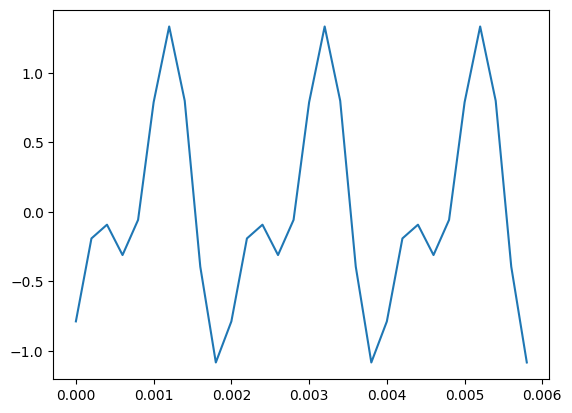

In [21]:
import numpy as np
import matplotlib.pyplot as plt
#Definir parámetros de la simulación

#Periodos de la señal
T1 = 1/500
T2 = 1/1000
T3 = 1/5500
#Periodo señal cuasiperiodica
T = 1/500
#Frecuencias
F1 = 1/T1
F2 = 1/T2
F3 = 1/T3
#Fs: frecuencia muestreo
Fs = 5000
Ts = 1/Fs #periodo muestreo

t = np.arange(0,3*T,Ts) #vector de tiempo que incluye tres periodos cuasiperiódica
x = 0.2121*np.cos(1000*np.pi*t) - 0.2121*np.sin(1000*np.pi*t) + 0.6*np.sin(2000*np.pi*t)-np.cos(11000*np.pi*t)

plt.plot(t,x)
plt.xlabel('')
plt.ylabel('')
plt.title('')
plt.show()


#Cero y Pendiente


Se crea código tipo función bajo el ambiente `def`, para generar el cero y pendiente según los valores $ y_{max})$ y $ y_{min} $ definidos $(-3.3[V], 3.3[V]))$:

$
y[t_n] \in [y_{min}, y_{max}]
$

$
y[t_n] = m x[t_n] + c
$

Donde:

$
m = \frac{y_{max} - y_{min}}{x_{max} - x_{min}}
$

$
c = y[t_n] - m x[t_n]
$


In [22]:
#cero y pendiente
def my_ceropen(x,ymin = -3.3, ymax = 3.3): #en general se pueden definir valores por defecto
  '''
  Codigo base para simular proceso de cero y pendiente
  Se ingresa arreglo de numpy y los valores min  y max despues de cero y pendiente
  '''
  xmax = max(x) # x.max()
  xmin = min(x) # x.min()
  m = (ymax - ymin)/(xmax - xmin)
  c = ymin - m*xmin
  y = m*x + c
  return y

In [23]:
#llamdo a cero y pendiente
y =  my_ceropen(x,ymin = -3.3, ymax = 3.3)

#Cuantización

Se crea función para cuantizar y completar el proceso de digitalización

In [24]:
from scipy.spatial.distance import cdist #función para estimar distancia punto discretizado al vector de estados
#función cuantización punto a punto
def my_cuantizador(yn, vq) : #yn punto a #cuantizar, vq vector de estados
  Ne = vq.shape[0] #tamaño vector de estados
  dn = cdist(yn.reshape(-1,1),vq.reshape(-1,1))#distancia yn a vector estados, reshape(-1,1) asegura vectores columna para poder utilizar cdist
  ind = np.argmin(dn) #posición distancia min
  return vq[ind]

In [25]:
#número de bits y vector de cuantización
nbits = 5
rmin = -3.3
rmax = 3.3
ve = np.linspace(rmin,rmax,2**nbits) # (rmax-rmin)/(2^#bits - 1) -> si se quiere incluir rmin y rmax

#recorrer vector cero y pendiente discretizado para cuantizar
for i in range(y.shape[0]):
   if i==0: #primera muestra
     yq = my_cuantizador(y[i],ve)
   else:
     yq = np.append(yq,my_cuantizador(y[i],ve)) #apilar datos cuantizando si i>0


#Graficar Señales

El código grafica el proceso de digitalización de una señal, incluyendo su forma continua, discreta y cuantizada, además de los niveles de cuantización. Sin embargo, la señal no está correctamente digitalizada, ya que la frecuencia de muestreo no es lo suficientemente alta para cumplir con el criterio de Nyquist, lo que puede provocar pérdida de información y aliasing.

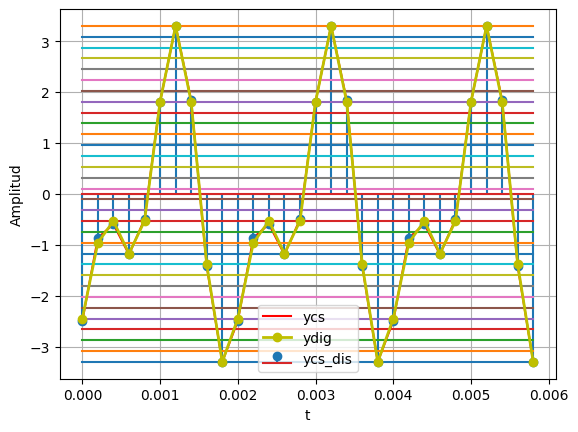

In [26]:
#graficar señales
plt.plot(t,y,c='r', label='ycs')#cs continua
plt.stem(t,y, label='ycs_dis')#cs discreta
#estados de cuantización
for v in ve:
  plt.plot(t,v*np.ones(len(t)))
# graficar señal Digital (discreta + cuantizada)

plt.plot(t,yq,c='y',marker='o',label='ydig', linewidth=2)
plt.legend()
plt.grid()
plt.xlabel('t')
plt.ylabel('Amplitud')
plt.show()

#Implementación de un conversor adecuado para la señal estudiada

Un conversor analógo-digital adecuado debe cumplir el criterio de Nyquist ($f_s \geq 2f_{max}$) para evitar aliasing y contar con una resolución en bits suficiente para una representación precisa. Además permite configurar la frecuencia de muestreo y la cantidad de bits, valida si $f_s$ es apropiada, alertar al usuario en caso contrario y grafica la señal continua, discreta y digitalizada para visualizar el proceso.


Introduce la frecuencia de muestreo (Fs): 16000
Se cumple el criterio de Nyquist.


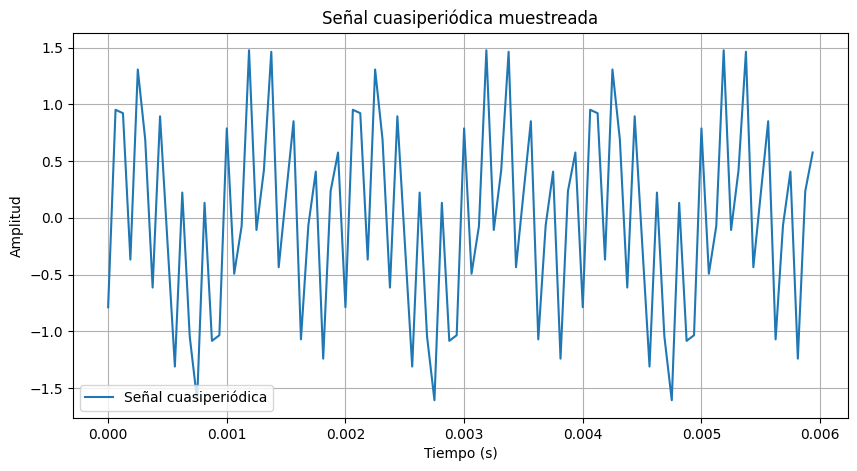

In [27]:
import numpy as np
import matplotlib.pyplot as plt

# Solicitar la frecuencia de muestreo como un valor entero
A = int(input("Introduce la frecuencia de muestreo (Fs): "))

# Definir periodos de las señales
T1 = 1 / 500
T2 = 1 / 1000
T3 = 1 / 5500

# Período de la señal cuasiperiódica
T = 1 / 500

# Calcular frecuencias
F1 = 1 / T1
F2 = 1 / T2
F3 = 1 / T3

# Establecer Fs inicial
Fs = A
Ts = 1 / Fs  # Periodo de muestreo

# Determinar la mayor frecuencia
mayor_F = max(F1, F2, F3)

# Verificar el criterio de Nyquist
if Fs >= 2 * mayor_F:
    print("Se cumple el criterio de Nyquist.")
else:
    Fs = 2 * mayor_F  # Ajustar Fs al doble de la mayor frecuencia
    print(f"No se cumple el criterio de Nyquist. Cambia la frecuencia de muestreo a al menos {Fs:.2f} Hz.")

# Crear el vector de tiempo para tres periodos de la señal cuasiperiódica
t = np.arange(0, 3 * T, Ts)

# Definir la señal cuasiperiódica
x = (
    0.2121 * np.cos(1000 * np.pi * t)
    - 0.2121 * np.sin(1000 * np.pi * t)
    + 0.6 * np.sin(2000 * np.pi * t)
    - np.cos(11000 * np.pi * t)
)

# Graficar la señal
plt.figure(figsize=(10, 5))
plt.plot(t, x, label='Señal cuasiperiódica')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.title('Señal cuasiperiódica muestreada')
plt.grid(True)
plt.legend()
plt.show()


#Cero y Pendiente


Se crea código tipo función bajo el ambiente `def`, para generar el cero y pendiente según los valores $ y_{max})$ y $ y_{min} $ definidos $(-3.3[V], 3.3[V]))$:

$
y[t_n] \in [y_{min}, y_{max}]
$

$
y[t_n] = m x[t_n] + c
$

Donde:

$
m = \frac{y_{max} - y_{min}}{x_{max} - x_{min}}
$

$
c = y[t_n] - m x[t_n]
$

In [28]:
#cero y pendiente
def my_ceropen(x,ymin = -3.3, ymax = 3.3): #en general se pueden definir valores por defecto
  '''
  Codigo base para simular proceso de cero y pendiente
  Se ingresa arreglo de numpy y los valores min  y max despues de cero y pendiente
  '''
  xmax = max(x) # x.max()
  xmin = min(x) # x.min()
  m = (ymax - ymin)/(xmax - xmin)
  c = ymin - m*xmin
  y = m*x + c
  return y

In [29]:
#llamdo a cero y pendiente
y =  my_ceropen(x,ymin = -3.3, ymax = 3.3)

#Cuantización

Se crea función para cuantizar y completar el proceso de digitalización

In [30]:
from scipy.spatial.distance import cdist #función para estimar distancia punto discretizado al vector de estados
#función cuantización punto a punto
def my_cuantizador(yn, vq) : #yn punto a #cuantizar, vq vector de estados
  Ne = vq.shape[0] #tamaño vector de estados
  dn = cdist(yn.reshape(-1,1),vq.reshape(-1,1))#distancia yn a vector estados, reshape(-1,1) asegura vectores columna para poder utilizar cdist
  ind = np.argmin(dn) #posición distancia min
  return vq[ind]

In [31]:
#número de bits y vector de cuantización
nbits = 5
rmin = -3.3
rmax = 3.3
ve = np.linspace(rmin,rmax,2**nbits) # (rmax-rmin)/(2^#bits - 1) -> si se quiere incluir rmin y rmax

#recorrer vector cero y pendiente discretizado para cuantizar
for i in range(y.shape[0]):
   if i==0: #primera muestra
     yq = my_cuantizador(y[i],ve)
   else:
     yq = np.append(yq,my_cuantizador(y[i],ve)) #apilar datos cuantizando si i>0

#Graficar Señales

Al aplicar correctamente el proceso de digitalización, y al ajustar la frecuencia de muestreo para que cumpla con el criterio de Nyquist, se logra obtener una señal digitalizada precisa, evitando problemas de aliasing y pérdida de información. Esto asegura que la señal discretizada y cuantizada represente fielmente la señal continua original, manteniendo su integridad para su posterior procesamiento.

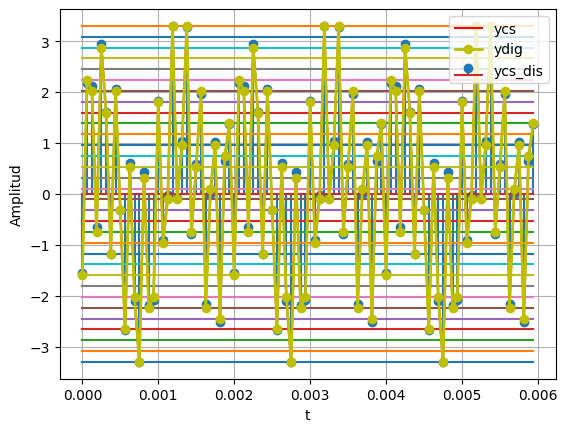

In [32]:
#graficar señales
plt.plot(t,y,c='r', label='ycs')#cs continua
plt.stem(t,y, label='ycs_dis')#cs discreta
#estados de cuantización
for v in ve:
  plt.plot(t,v*np.ones(len(t)))
# graficar señal Digital (discreta + cuantizada)

plt.plot(t,yq,c='y',marker='o',label='ydig', linewidth=2)
plt.legend()
plt.grid()
plt.xlabel('t')
plt.ylabel('Amplitud')
plt.show()

# Solución del punto #2 del parcial de Señales y Sistemas

# Pregunta 2 (valor 2.5 puntos)

Se dispone de un sistema modelado como una "caja negra" (ver celdas de código). Su tarea es analizar y comprobar mediante simulaciones si el sistema cumple con las propiedades de linealidad e invariancia en el tiempo. En caso de que el sistema sea lineal e invariante con el tiempo, determine su respuesta al impulso y utilice esta respuesta para calcular la salida del sistema ante la siguiente señal:

$x[n] = \sin[100 \pi n ] + \sin[600 \pi n]$

In [33]:
# cargar sistema
FILEID = "1J9rhh0wWHZSBd8XmWGt1ZpCsMDuoUFmm"
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id='$FILEID -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id="$FILEID -O P1_model.zip && rm -rf /tmp/cookies.txt
!unzip -o P1_model.zip
!dir

--2024-12-18 04:27:54--  https://docs.google.com/uc?export=download&confirm=&id=1J9rhh0wWHZSBd8XmWGt1ZpCsMDuoUFmm
Resolving docs.google.com (docs.google.com)... 173.194.206.138, 173.194.206.101, 173.194.206.102, ...
Connecting to docs.google.com (docs.google.com)|173.194.206.138|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1J9rhh0wWHZSBd8XmWGt1ZpCsMDuoUFmm&export=download [following]
--2024-12-18 04:27:55--  https://drive.usercontent.google.com/download?id=1J9rhh0wWHZSBd8XmWGt1ZpCsMDuoUFmm&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 64.233.181.132, 2607:f8b0:4001:c09::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|64.233.181.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 732 [application/octet-stream]
Saving to: ‘P1_model.zip’

P1_model.zip        100%[===================>]     732  --.-KB/s    i

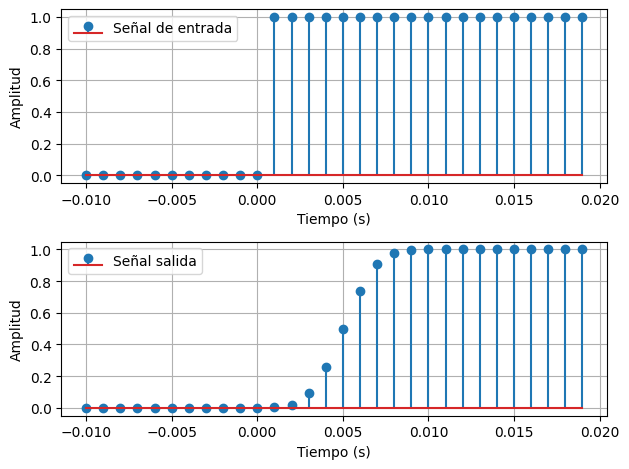

In [34]:
import numpy as np
import matplotlib.pyplot as plt
import joblib
from P1_model import system_
from scipy.signal import firwin, freqz, lfilter, filtfilt

#sistema pregunta 2
my_system = system_.My_System()
my_system.create_()
fs = my_system.fs #frecuencia de muestreo
t = np.arange(-0.01, 0.02, 1/fs)  # Tiempo
signal_u = np.heaviside(t,1) # función heaviside
y_u = my_system.predict(signal_u)


# Visualización de las señales
fig, axs = plt.subplots(2,1)
axs[0].stem(t, signal_u, label='Señal de entrada')
axs[0].set_xlabel('Tiempo (s)')
axs[0].set_ylabel('Amplitud')
axs[0].legend()
axs[0].grid()
axs[1].stem(t,y_u, label='Señal salida')
axs[1].set_xlabel('Tiempo (s)')
axs[1].set_ylabel('Amplitud')
axs[1].legend()
axs[1].grid()
plt.tight_layout()
plt.show()

Este código compara la salida original del sistema con la salida del sistema después de aplicar un escalado (tanto en la entrada como en la salida). La gráfica permite visualizar si el sistema responde de manera proporcional (lineal) al escalado de la entrada, lo que indica la linealidad del sistema.

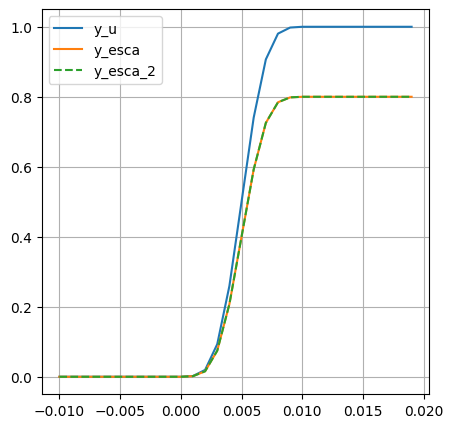

In [35]:
#Se verifica la linealidad
from ctypes import c_bool
a = 0.8
c_linealidad = a*signal_u

y_esca = my_system.predict(c_linealidad)

y_esca_2 = a*y_u

plt.figure(figsize=(5, 5))
plt.plot(t,y_u,label='y_u')
plt.plot(t,y_esca,label='y_esca')
plt.plot(t,y_esca_2,label='y_esca_2',linestyle="--")
plt.legend()
plt.grid()

Este código verifica si el sistema es invariante en el tiempo, lo que significa que si se desplaza la entrada, la salida también debería desplazarse de la misma manera. El código desplaza la señal de entrada, calcula la salida correspondiente para esta señal desplazada, y luego muestra gráficas de la señal de entrada original y la salida original del sistema para su comparación.

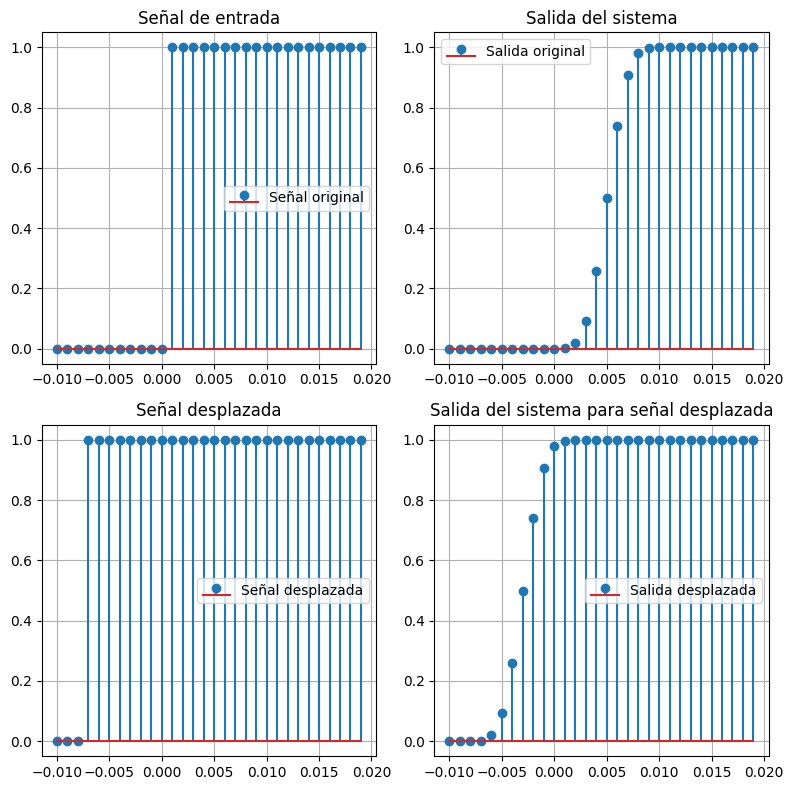

In [36]:
#Se verifica si la señal es invariante en el tiempo
import numpy as np
import matplotlib.pyplot as plt
import joblib
from P1_model import system_
from scipy.signal import firwin, freqz, lfilter, filtfilt

# Sistema de la pregunta 2
my_system = system_.My_System()
my_system.create_()
fs = my_system.fs  # Frecuencia de muestreo
t = np.arange(-0.01, 0.02, 1/fs)  # Tiempo
signal_u = np.heaviside(t, 1)  # Función Heaviside

# Salida del sistema para la señal original
y_u = my_system.predict(signal_u)

# Desplazamiento de la señal
k = -8  # Número de muestras a desplazar
t_shifted = t - k/fs  # Desplazamos el tiempo, ajustamos por la frecuencia de muestreo
x_shifted = np.heaviside(t_shifted, 1)  # Señal desplazada

# Salida del sistema para la señal desplazada
y_u_shifted = my_system.predict(x_shifted)

# Crear subplots
fig, axs = plt.subplots(2, 2, figsize=(8, 8))  # Crear una cuadrícula 2x2 de subgráficas

# Señal original
axs[0, 0].stem(t, signal_u, label='Señal original')
axs[0, 0].legend()
axs[0, 0].set_title('Señal de entrada')
axs[0, 0].grid()

# Salida original
axs[0, 1].stem(t, y_u, label='Salida original')  # Usar y_u como salida del sistema
axs[0, 1].legend()
axs[0, 1].set_title('Salida del sistema')
axs[0, 1].grid()

# Señal desplazada
axs[1, 0].stem(t, x_shifted, label='Señal desplazada')
axs[1, 0].legend()
axs[1, 0].set_title('Señal desplazada')
axs[1, 0].grid()

# Salida desplazada
axs[1, 1].stem(t, y_u_shifted, label='Salida desplazada')  # Usar y_u_shifted como salida del sistema
axs[1, 1].legend()
axs[1, 1].set_title('Salida del sistema para señal desplazada')
axs[1, 1].grid()

# Mostrar la figura con los subplots
plt.tight_layout()  # Ajusta los márgenes para que no se sobrepongan
plt.show()


Ahora este  código genera una señal de entrada compuesta por dos ondas senoidales de frecuencias diferentes, y se visualizan en un gráfico de tiempo discreto. También calcula la diferencia de una señal de salida del sistema para su posterior análisis.

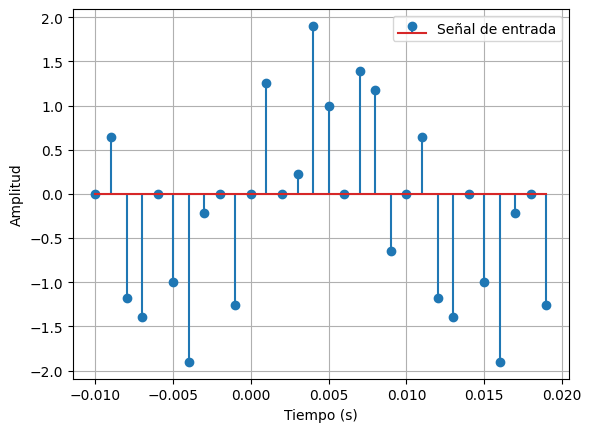

In [37]:

hu = y_u
h = np.diff(hu).reshape(-1,1)
x = np.sin(100*np.pi*t) + np.sin(600*np.pi*t)
plt.figure()
plt.stem(t, x, label='Señal de entrada')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.legend()
plt.grid()

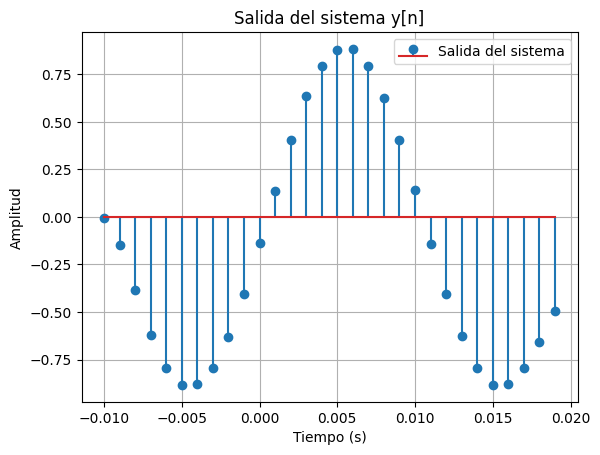

In [38]:
# Realizar la convolución
y_salida = np.convolve(x, h.flatten(), mode='same')

# Visualización
plt.stem(t, y_salida[:len(t)], label='Salida del sistema')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.legend()
plt.grid()
plt.title('Salida del sistema y[n]')
plt.show()

En sistemas SLTI, la convolución permite calcular la salida a partir de la respuesta al impulso, que describe cómo el sistema reacciona a una señal simple. Al combinar la entrada con esta respuesta a lo largo del tiempo, la convolución muestra cómo el sistema modifica la señal de entrada.

En tiempo discreto, la convolución calcula la salida de un sistema digital combinando la señal de entrada con su respuesta al impulso en puntos específicos, mostrando cómo el sistema modifica la señal a lo largo del tiempo.